## Data Loading and Initial Exploration

Before diving into analysis, we need to import essential libraries and load our dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
df = pd.read_csv('food_trucks.csv')
df.head()

,Name,Address,Rating,Website,Opening Hours,Cuisine Type,Latitude,Longitude
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,NaN,"Monday: 11:00 AM – 7:00 PM, Tuesday: 11:00 AM ...","Latin American, Empanadas, Tacos",39.642731,-86.120180
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Monday: Closed, Tuesday: Closed, Wednesday: 5:...","Mexican, Food Trucks",39.809920,-86.221209
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Monday: 11:00 AM – 10:00 PM, Tuesday: 11:00 AM...","Latin American, Empanadas, Tacos",39.826405,-86.006841
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Monday: Closed, Tuesday: 7:30 PM – 12:00 AM, W...","Tacos, Food Trucks",39.897543,-86.216448
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,NaN,NaN,Tacos,39.772545,-86.040350



## Handling Missing Data

Before proceeding with further analysis or modeling, it's essential to identify and handle missing data. This ensures the data is robust and won't lead to misleading results.

In [2]:
# Check for missing data in each column
missing_data = df.isnull().sum()

# Handle missing data
df['Website'].fillna('Not Available', inplace=True)
df['Opening Hours'].fillna('Not Specified', inplace=True)
df['Cuisine Type'].fillna('Unknown', inplace=True)

# Check if there are any missing values left
missing_data_after = df.isnull().sum()

df.head()

,Name,Address,Rating,Website,Opening Hours,Cuisine Type,Latitude,Longitude
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,"Monday: 11:00 AM – 7:00 PM, Tuesday: 11:00 AM ...","Latin American, Empanadas, Tacos",39.642731,-86.120180
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Monday: Closed, Tuesday: Closed, Wednesday: 5:...","Mexican, Food Trucks",39.809920,-86.221209
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Monday: 11:00 AM – 10:00 PM, Tuesday: 11:00 AM...","Latin American, Empanadas, Tacos",39.826405,-86.006841
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Monday: Closed, Tuesday: 7:30 PM – 12:00 AM, W...","Tacos, Food Trucks",39.897543,-86.216448
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Not Specified,Tacos,39.772545,-86.040350


## Extracting Opening Hours
In this section, we utilize Python's regular expressions to extract the opening and closing hours for each day of the week from the dataset.

In [3]:
import re
# Extracting opening hours for each day
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def extract_hours(opening_hours_str, day):
    if not isinstance(opening_hours_str, str):
        return ("Closed", "Closed")
    
    pattern = f"{day}: (\\d+:\\d+ [APMapm]+) – (\\d+:\\d+ [APMapm]+)"
    match = re.search(pattern, opening_hours_str)
    if match:
        return match.groups()
    else:
        return ("Closed", "Closed")

# For each day, create columns for open and close hours
for day in days:
    df[f'{day}_Open'], df[f'{day}_Close'] = zip(*df['Opening Hours'].apply(lambda x: extract_hours(x, day)))

df.head()


,Name,Address,Rating,Website,Opening Hours,Cuisine Type,Latitude,Longitude,Monday_Open,Monday_Close,...,Wednesday_Open,Wednesday_Close,Thursday_Open,Thursday_Close,Friday_Open,Friday_Close,Saturday_Open,Saturday_Close,Sunday_Open,Sunday_Close
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,"Monday: 11:00 AM – 7:00 PM, Tuesday: 11:00 AM ...","Latin American, Empanadas, Tacos",39.642731,-86.120180,11:00 AM,7:00 PM,...,11:00 AM,7:00 AM,10:30 AM,7:30 PM,10:30 AM,7:00 PM,11:00 AM,8:30 PM,Closed,Closed
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Monday: Closed, Tuesday: Closed, Wednesday: 5:...","Mexican, Food Trucks",39.809920,-86.221209,Closed,Closed,...,5:00 PM,1:00 AM,5:00 PM,1:00 AM,5:00 PM,4:00 AM,5:00 PM,4:00 AM,5:00 PM,1:00 AM
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Monday: 11:00 AM – 10:00 PM, Tuesday: 11:00 AM...","Latin American, Empanadas, Tacos",39.826405,-86.006841,11:00 AM,10:00 PM,...,11:00 AM,10:00 PM,11:00 AM,11:00 PM,11:00 AM,11:00 PM,11:00 AM,11:00 PM,11:00 AM,10:00 PM
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Monday: Closed, Tuesday: 7:30 PM – 12:00 AM, W...","Tacos, Food Trucks",39.897543,-86.216448,Closed,Closed,...,7:30 PM,12:00 AM,7:30 PM,12:00 AM,7:30 PM,12:00 AM,Closed,Closed,Closed,Closed
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Not Specified,Tacos,39.772545,-86.040350,Closed,Closed,...,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed


## Calculate Operating Hours for Food Trucks

The following code calculates the number of operating hours for food trucks based on their opening and closing times. The results are then added to a DataFrame.

In [4]:
from datetime import datetime, timedelta

def calculate_hours(open_time, close_time):
    # If the food truck is closed on that day, return 0 hours
    if open_time == "Closed" or close_time == "Closed":
        return 0
    
    # Convert the 12-hour time format to 24-hour format
    open_24hr = datetime.strptime(open_time, "%I:%M %p").time()
    close_24hr = datetime.strptime(close_time, "%I:%M %p").time()
    
    # Calculate the number of hours the food truck is open
    if close_24hr > open_24hr:
        delta = datetime.combine(datetime.today(), close_24hr) - datetime.combine(datetime.today(), open_24hr)
    else:  # If the food truck operates past midnight
        delta = datetime.combine(datetime.today() + timedelta(days=1), close_24hr) - datetime.combine(datetime.today(), open_24hr)
    
    # Return the number of hours as a float (e.g., 7.5 for 7 hours 30 minutes)
    return delta.seconds / 3600

# For each day, calculate the number of hours the food truck is open
for day in days:
    df[f'{day}_Hours'] = df.apply(lambda x: calculate_hours(x[f'{day}_Open'], x[f'{day}_Close']), axis=1)

# Calculate the total weekly hours
df['Total_Weekly_Hours'] = df[[f'{day}_Hours' for day in days]].sum(axis=1)

# Drop the original 'Cuisine Type' column as we have granularized it
df.drop(columns=['Opening Hours'], inplace=True)

df.head()

,Name,Address,Rating,Website,Cuisine Type,Latitude,Longitude,Monday_Open,Monday_Close,Tuesday_Open,...,Sunday_Open,Sunday_Close,Monday_Hours,Tuesday_Hours,Wednesday_Hours,Thursday_Hours,Friday_Hours,Saturday_Hours,Sunday_Hours,Total_Weekly_Hours
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,"Latin American, Empanadas, Tacos",39.642731,-86.120180,11:00 AM,7:00 PM,11:00 AM,...,Closed,Closed,8.0,8.5,20.0,9.0,8.5,9.5,0.0,63.5
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Mexican, Food Trucks",39.809920,-86.221209,Closed,Closed,Closed,...,5:00 PM,1:00 AM,0.0,0.0,8.0,8.0,11.0,11.0,8.0,46.0
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Latin American, Empanadas, Tacos",39.826405,-86.006841,11:00 AM,10:00 PM,11:00 AM,...,11:00 AM,10:00 PM,11.0,11.0,11.0,12.0,12.0,12.0,11.0,80.0
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Tacos, Food Trucks",39.897543,-86.216448,Closed,Closed,7:30 PM,...,Closed,Closed,0.0,4.5,4.5,4.5,4.5,0.0,0.0,18.0
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Tacos,39.772545,-86.040350,Closed,Closed,Closed,...,Closed,Closed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting and Processing the 'Cuisine Type' Column

In this section, we perform several operations on the 'Cuisine Type' column:

In [5]:
# Splitting the 'Cuisine Type' column and creating dummy variables
cuisine_dummies = df['Cuisine Type'].str.get_dummies(sep=', ').add_prefix('Cuisine_')

# Merge the dummy variables with the original dataframe
df = pd.concat([df, cuisine_dummies], axis=1)

df['Cuisine_Mexican'] = df['Cuisine_Mexican'] | df['Cuisine_Tacos']

# Columns to remove based on the specified cuisines/services
columns_to_remove = [
    'Cuisine Type',
    'Cuisine_Wine & Spirits',
    'Cuisine_Beer',
    'Cuisine_Cocktail Bars',
    'Cuisine_Desserts',
    'Cuisine_Food Delivery Services',
    'Cuisine_Food Stands',
    'Cuisine_Sushi Bars',
    'Cuisine_Bakeries',
    'Cuisine_Food Trucks',
    'Cuisine_Unknown',
    'Cuisine_Tacos'
]

# Removing the specified columns
df.drop(columns=columns_to_remove, inplace=True)


df.head()

,Name,Address,Rating,Website,Latitude,Longitude,Monday_Open,Monday_Close,Tuesday_Open,Tuesday_Close,...,Saturday_Hours,Sunday_Hours,Total_Weekly_Hours,Cuisine_American (New),Cuisine_Barbeque,Cuisine_Empanadas,Cuisine_Latin American,Cuisine_Mexican,Cuisine_Vegetarian,Cuisine_Venezuelan
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,39.642731,-86.120180,11:00 AM,7:00 PM,11:00 AM,7:30 PM,...,9.5,0.0,63.5,0,0,1,1,1,0,0
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,39.809920,-86.221209,Closed,Closed,Closed,Closed,...,11.0,8.0,46.0,0,0,0,0,1,0,0
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,39.826405,-86.006841,11:00 AM,10:00 PM,11:00 AM,10:00 PM,...,12.0,11.0,80.0,0,0,1,1,1,0,0
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,39.897543,-86.216448,Closed,Closed,7:30 PM,12:00 AM,...,0.0,0.0,18.0,0,0,0,0,1,0,0
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,39.772545,-86.040350,Closed,Closed,Closed,Closed,...,0.0,0.0,0.0,0,0,0,0,1,0,0


## Saving the Cleaned Dataset

After processing and cleaning the dataset, we save the cleaned data to a new CSV file for further analysis and usage.

In [6]:
df.to_csv('Cleaned_food_trucks.csv')

## Start of EDA

To begin our exploratory data analysis, let's first get an understanding of the structure of our dataset.

In [7]:
#Start of EDA
print(df.shape)

print(df.describe())

print(df.dtypes)

(20, 35)
          Rating   Latitude  Longitude  Monday_Hours  Tuesday_Hours  \
count  20.000000  20.000000  20.000000     20.000000      20.000000   
mean    4.055000  39.794772 -86.146375      2.900000       3.675000   
std     1.298369   0.067903   0.076949      4.822098       5.019108   
min     0.000000  39.642731 -86.242286      0.000000       0.000000   
25%     4.000000  39.763577 -86.217638      0.000000       0.000000   
50%     4.500000  39.799098 -86.152301      0.000000       0.000000   
75%     4.725000  39.826612 -86.078098      6.250000       7.375000   
max     5.000000  39.927865 -86.006841     14.000000      14.000000   

       Wednesday_Hours  Thursday_Hours  Friday_Hours  Saturday_Hours  \
count        20.000000       20.000000     20.000000       20.000000   
mean          4.650000        4.450000      7.000000        6.200000   
std           6.104571        5.049492      5.286527        5.442039   
min           0.000000        0.000000      0.000000        0.0

## Distribution of Operating Hours for Each Day
The following code visualizes the distribution of operating hours for each day of the week using histograms.

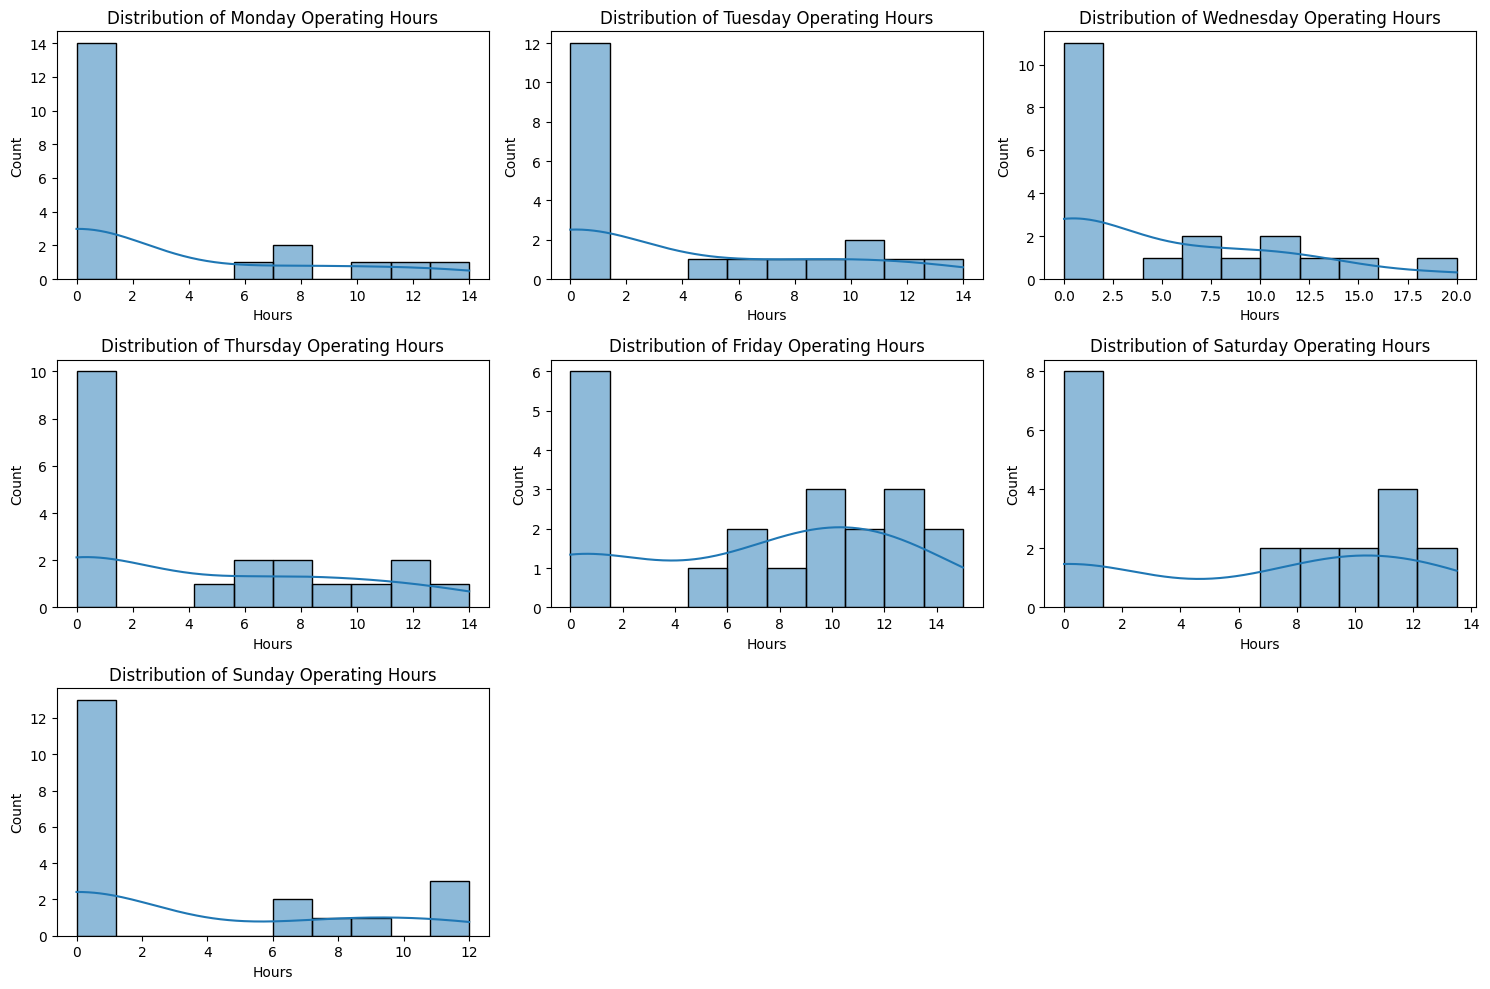

In [8]:
# Plotting distribution of operating hours for each day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 10))
for idx, day in enumerate(days_of_week):
    plt.subplot(3, 3, idx+1)
    sns.histplot(df[f'{day}_Hours'], bins=10, kde=True)
    plt.title(f'Distribution of {day} Operating Hours')
    plt.xlabel('Hours')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

## Cuisine Type Analysis
In this section, we're focusing on extracting and analyzing the types of cuisines offered by various trucks.

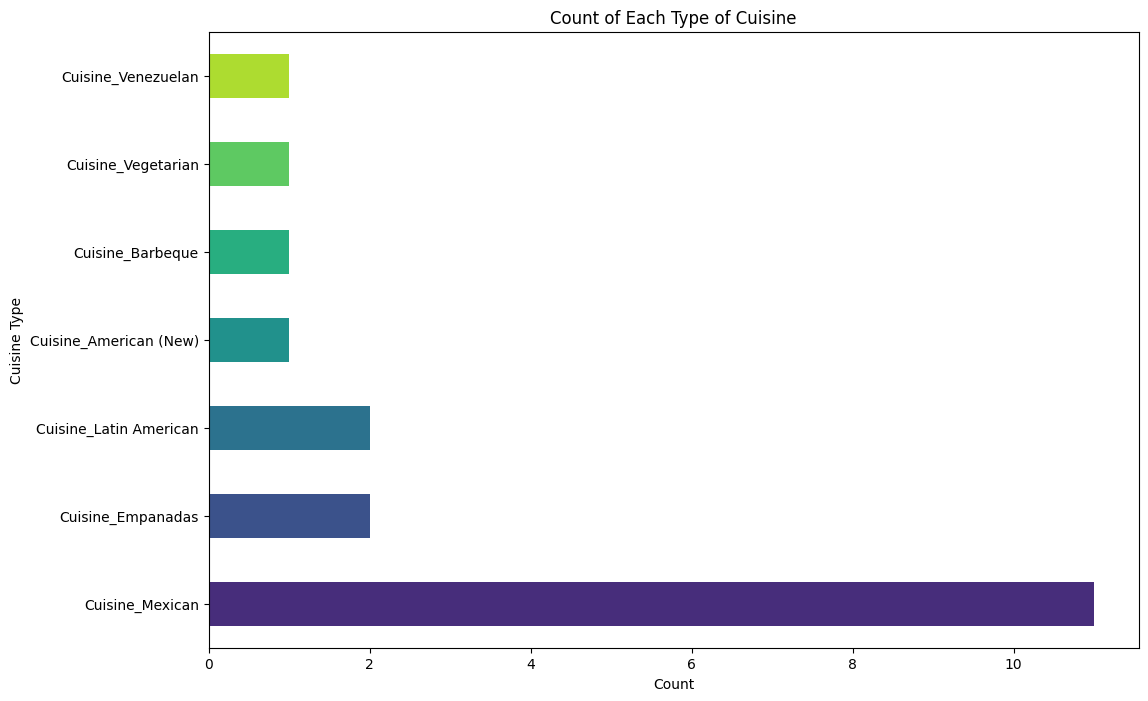

In [9]:
# Extracting columns related to cuisine
cuisine_columns = [col for col in df.columns if 'Cuisine_' in col]

# Counting the number of trucks offering each type of cuisine
cuisine_counts = df[cuisine_columns].sum().sort_values(ascending=False)

# Plotting the count of each type of cuisine
plt.figure(figsize=(12, 8))
cuisine_counts.plot(kind='barh', color=sns.color_palette("viridis", len(cuisine_counts)))
plt.title('Count of Each Type of Cuisine')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

## Histogram for Food Truck Ratings

The following code visualizes the distribution of ratings for food trucks using a histogram:

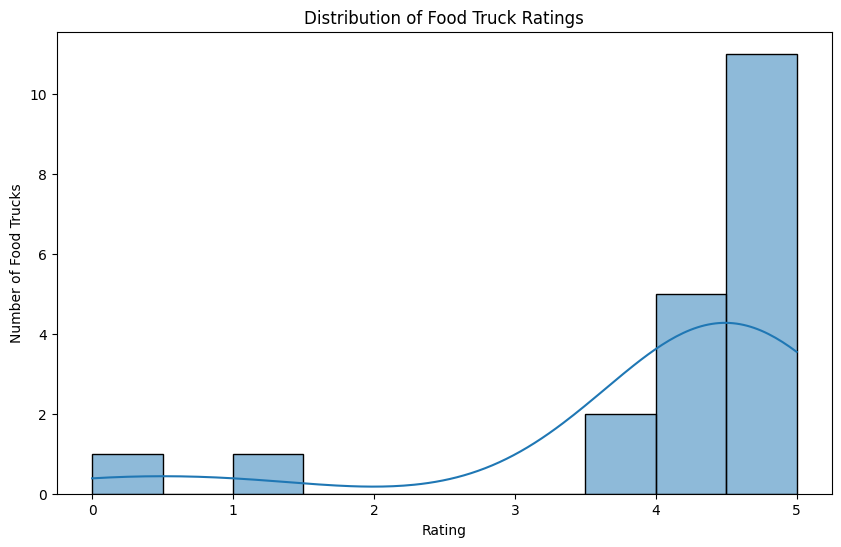

In [10]:
# Histogram for the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Food Truck Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Food Trucks')
plt.show()

## Filtering Food Trucks for Weekends

We're interested in food trucks that are popular and operate on weekends. The following code achieves this:

In [11]:
# Filter the food trucks that are open on Saturday and Sunday with a rating of 4 or above
weekend_food_trucks = df[(df['Saturday_Hours'] > 0) & 
                                 (df['Sunday_Hours'] > 0) & 
                                 (df['Rating'] >= 4)]

# Display the first few rows of the filtered data
weekend_food_trucks[['Name', 'Address', 'Rating', 'Saturday_Hours', 'Sunday_Hours']].head()


,Name,Address,Rating,Saturday_Hours,Sunday_Hours
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,11.0,8.0
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,12.0,11.0
7,ClusterTruck,"729 N Pennsylvania St, Indianapolis, IN 46204,...",4.8,13.0,11.0
11,FELIX TACOS TRUCK,"3145 W Washington St, Indianapolis, IN 46222, ...",4.5,9.0,7.0
15,El Amigo Taqueria Food Truck,"3356 W 16th St, Indianapolis, IN 46222, United...",4.3,12.0,12.0


## Travel Time Calculation for Top-Rated Food Trucks

This section of the code focuses on calculating the travel time and distance between top-rated food trucks.

In [12]:
import geopy.distance

# Sort the food trucks by rating in descending order
sorted_food_trucks = weekend_food_trucks.sort_values(by="Rating", ascending=False).head(8)

# Function to calculate travel time (in minutes) between two coordinates
def travel_time(coord1, coord2):
    # Calculate distance using geopy
    distance = geopy.distance.distance(coord1, coord2).miles
    # Assuming average city speed of 30 mph
    time = (distance / 30) * 60
    return time, distance

# Calculate travel times and distances between the selected food trucks
travel_data = []
for i in range(len(sorted_food_trucks)-1):
    start = (sorted_food_trucks.iloc[i]['Latitude'], sorted_food_trucks.iloc[i]['Longitude'])
    end = (sorted_food_trucks.iloc[i+1]['Latitude'], sorted_food_trucks.iloc[i+1]['Longitude'])
    time, distance = travel_time(start, end)
    travel_data.append({
        "Start": sorted_food_trucks.iloc[i]['Name'],
        "End": sorted_food_trucks.iloc[i+1]['Name'],
        "Travel Time (mins)": time,
        "Distance (miles)": distance
    })

travel_df = pd.DataFrame(travel_data)
travel_df


,Start,End,Travel Time (mins),Distance (miles)
0,The Night Owl Food Truck,ClusterTruck,2.207861,1.103930
1,ClusterTruck,Pico de Gallo Food Truck,8.286848,4.143424
2,Pico de Gallo Food Truck,FELIX TACOS TRUCK,6.390370,3.195185
3,FELIX TACOS TRUCK,El Amigo Taqueria Food Truck,3.346293,1.673146
4,El Amigo Taqueria Food Truck,The Latin Flavor - Food Truck,22.799888,11.399944



## Creating a Foodie Plan
The given code block is designed to construct a two-day foodie plan based on the travel_df dataframe. The plan starts at "10:00 AM" and incorporates visits to various food trucks, with an allocation of 2 hours at each food truck followed by travel to the next destination. The schedule covers both Saturday and Sunday, with up to 4 food truck visits each day.

#### The key features of this code are:

Initialization of the starting time for the plan.
Iteration through the travel_df dataframe to determine the sequence of visits.
Addition of travel details between food trucks.
Final inclusion of the last food truck in the sequence.
Conversion of the constructed plan data into a pandas DataFrame (foodie_plan_df).
The resulting foodie_plan_df DataFrame provides a detailed itinerary, including day, time, food truck name, address, cuisine, travel time, travel distance, and transportation type.

In [13]:
from datetime import datetime, timedelta

# Initialize the starting time for the plan
start_time = datetime.strptime("10:00 AM", "%I:%M %p")

# Create the foodie plan
plan_data = []
current_time = start_time

for i, row in travel_df.iterrows():
    # Add the start food truck details
    plan_data.append({
        "Day": "Saturday" if i < 4 else "Sunday",  # 4 food trucks per day
        "Time": current_time.strftime("%I:%M %p"),
        "Name": row["Start"],
        "Address": sorted_food_trucks[sorted_food_trucks['Name'] == row["Start"]]['Address'].values[0],
        "Cuisine": ", ".join(sorted_food_trucks.columns[sorted_food_trucks[sorted_food_trucks['Name'] == row["Start"]].iloc[0] == 1].str.replace('Cuisine_', '')),
        "Travel Time (mins)": "",
        "Travel Distance (miles)": "",
        "Transportation Type": ""
    })
    
    # Update the current time based on duration at the food truck
    current_time += timedelta(hours=2)
    
    # Add the travel details
    plan_data.append({
        "Day": "Saturday" if i < 4 else "Sunday",
        "Time": current_time.strftime("%I:%M %p"),
        "Name": "Traveling...",
        "Address": "",
        "Cuisine": "",
        "Travel Time (mins)": round(row["Travel Time (mins)"]),
        "Travel Distance (miles)": round(row["Distance (miles)"], 2),
        "Transportation Type": "Personal Car"
    })
    
    # Update the current time based on travel
    current_time += timedelta(minutes=row["Travel Time (mins)"])

# Add the last food truck details
last_truck = sorted_food_trucks.iloc[-1]
plan_data.append({
    "Day": "Sunday",
    "Time": current_time.strftime("%I:%M %p"),
    "Name": last_truck["Name"],
    "Address": last_truck['Address'],
    "Cuisine": ", ".join(sorted_food_trucks.columns[last_truck == 1].str.replace('Cuisine_', '')),
    "Travel Time (mins)": "",
    "Travel Distance (miles)": "",
    "Transportation Type": ""
})

# Convert the plan data to a DataFrame
foodie_plan_df = pd.DataFrame(plan_data)
foodie_plan_df.to_csv('weekend_food_plan.csv',index=False)


## Visualization of Food Trucks in Indianapolis
This cell is designed to visualize the locations of various food trucks in Indianapolis using the folium library. The base map is centered around Indianapolis, and markers are added for each food truck. Additionally, a polyline is drawn to represent the travel route connecting these food trucks.

In [14]:
import folium

# Initialize a base map centered around Indianapolis
m = folium.Map(location=[39.7684, -86.1581], zoom_start=12)

# Add markers for each food truck and draw lines for the travel route
locations = []
for i, row in sorted_food_trucks.iterrows():
    location = (row['Latitude'], row['Longitude'])
    locations.append(location)
    folium.Marker(location, tooltip=row['Name'], popup=row['Address']).add_to(m)

# Add lines for the route
folium.PolyLine(locations, color="blue", weight=2.5, opacity=1).add_to(m)

m
